In [2]:
# Import libraries
import itertools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix

In [3]:
# Define function that evaluates model using F1 score and AUC ROC
def evaluate_model(best_estimator, X_test, y_test):
    y_pred = best_estimator.predict(X_test)    
    
    y_prob = best_estimator.predict_proba(X_test)
    
    f1_eval_score = f1_score(y_test, y_pred, average='weighted')
    auc_eval_score = roc_auc_score(y_test, y_pred, average='weighted')
    
    print("##### F1 Score:", f1_eval_score)
    print()
    
    print("##### AUC Score:", auc_eval_score)
    print()
    
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, ['False', 'True'], title='Confusion matrix', cmap=plt.cm.Purples)
    

# Define function to plot confussion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Purples):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
        
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    plt.show()

In [4]:
# Load data
data = pd.read_csv('clean_train.csv', sep=';', decimal=',')

In [5]:
# Convert boolean target variable to binary 0-1 values.
# y = pd.Series(np.zeros(data.shape[0]))
# y[data['EXTRA_BAGGAGE']] = 1

# Split data to separate 'y' and 'X'.
y = data['EXTRA_BAGGAGE']

# Drop target variable from X DataFrame
X = data.drop('EXTRA_BAGGAGE', 1)

In [6]:
# Split data into training and test, asumming the 'test.csv' data is future data and the 
# 'train.csv' data is the only one we have available.

# Use 'stratify' option since data is imbalanced and we want to keep the distribution of 
# each class in both datasets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=875146, stratify=y)

In [9]:
# Train LogisticRegression model with default parameters and evaluate model with test data. 
# Use this model as baseline to improve performance.
baseline = LogisticRegression(class_weight='balanced', random_state=621473)

baseline.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=621473,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

##### F1 Score: 0.66133700926

##### AUC Score: 0.639509557254



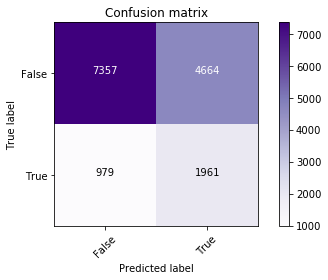

In [10]:
evaluate_model(baseline, X_test, y_test)